In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import gudhi as gd
import itertools

import igraph as ig

import tadasets
from datetime import datetime

import ecc
import ecc_plot
import euler_edges
import cliques_counting as cc
import cliques_counting_igraph as cc_ig

In [2]:
def compare_methods(points, epsilon, draw_lines=True):
    # ECC
    print("Local Simplex")
    start=datetime.now()
    c_ls, ns_ls = ecc.compute_local_contributions(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c_ls))
     
    e_ls = ecc_plot.euler_characteristic_list_from_all(c_ls)
    print("\t simplicies found:          ", ns_ls)
    print("\t points in the ecc plot:    ", len(e_ls))
    
    ecc_plot.plot_euler_curve(e_ls, draw_lines, "Local Simplex")
    
    # cliques counting
    print("\n Cliques counting")
    start=datetime.now()
    c, ns = cc.compute_all_contributions_nx(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c))
    
    e_cc = ecc_plot.euler_characteristic_list_from_all(c)
    print("\t simplicies found:          ", ns)
    print("\t points in the ecc plot:    ", len(e_cc))
    
    ecc_plot.plot_euler_curve(e_cc, draw_lines, "Cliques counting")
    
    
    # cliques counting igraph
    print("\n Cliques counting igraph")
    start=datetime.now()
    c_ig, ns_ig = cc_ig.compute_all_contributions_ig(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c))
    
    e_cc_ig = ecc_plot.euler_characteristic_list_from_all(c_ig)
    print("\t simplicies found:          ", ns_ig)
    print("\t points in the ecc plot:    ", len(e_cc_ig))
    
    ecc_plot.plot_euler_curve(e_cc_ig, draw_lines, "Cliques counting")
    
    #assert((e == e_cc).all())
    
    
#     # edges
#     print("\n Edges")
#     start=datetime.now()
#     c = euler_edges.compute_local_contributions_gd(points, epsilon)
#     print("\t time:", datetime.now()-start)
#     print("\t contributions list lenght: ", len(c))
    
#     e_ee = euler_edges.euler_characteristic_list_from_edges(c)
#     print("\t points in the ecc plot:    ", len(e_ee))
#     ecc_plot.plot_euler_curve(e_ee, draw_lines, "Edges")    
    
#     # full simplex
#     print("\n Full simplex")
#     start=datetime.now()
#     rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
#     simplex_tree = rips_complex.create_simplex_tree(max_dimension=len(points))
    
#     c_full = simplex_tree.get_filtration()
    
#     print("\t time:", datetime.now()-start)
#     print("\t contributions list lenght: ", len(c_full))
    
#     e_full = ecc_plot.euler_characteristic_list_from_all(c_full)
#     print("\t points in the ecc plot:    ", len(e_full))
    
#     ecc_plot.plot_euler_curve(e_full, draw_lines, "Full Simplex")

# TEST

## Triangle

In [3]:
point_cloud = np.array([[0, 0], [4,0], [0,3] ])

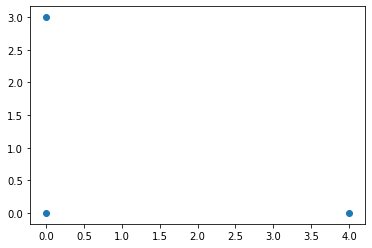

In [4]:
plt.scatter(point_cloud[: , 0], point_cloud[: , 1])

Local Simplex
	 time: 0:00:00.000825
	 contributions list lenght:  3
	 simplicies found:     7
	 points in the ecc plot:     3

 Cliques counting
	 time: 0:00:00.000406
	 contributions list lenght:  3
	 simplicies found:     7
	 points in the ecc plot:     3

 Cliques counting igraph
	 time: 0:00:00.000799
	 contributions list lenght:  3
	 simplicies found:     7
	 points in the ecc plot:     3


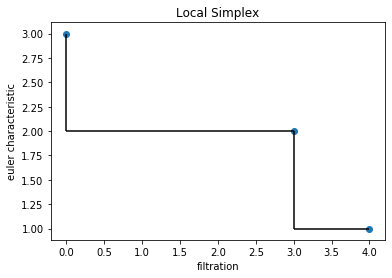

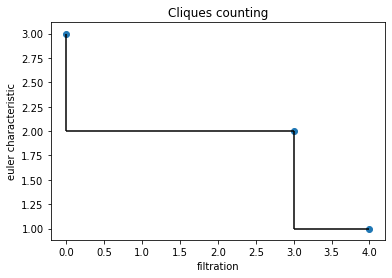

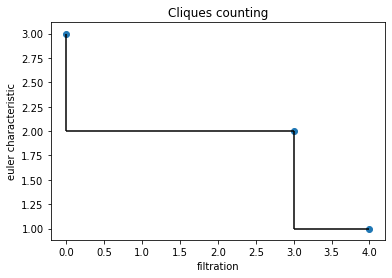

In [5]:
compare_methods(point_cloud, 10)

## Rhomboid

In [6]:
point_cloud = np.array([[4,0], [0,3.5], [-2, 0], [-0.5, -3]])

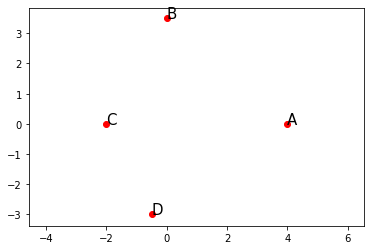

In [7]:
plt.axis('equal')
labels = ["A", "B", "C", "D"]
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "red")
    plt.text(point_cloud[i][0], point_cloud[i][1], labels[i], fontsize =15)



 Cliques counting
	 time: 0:00:00.000554
	 contributions list lenght:  15
	 points in the ecc plot:     7

 Cliques counting igraph
	 time: 0:00:00.000402
	 contributions list lenght:  15
	 points in the ecc plot:     7


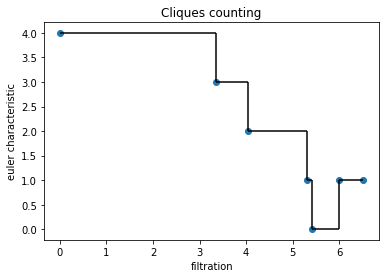

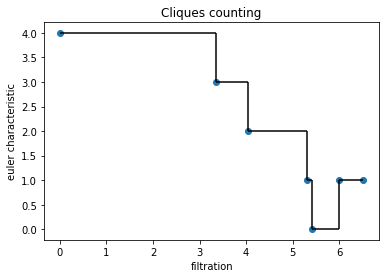

In [8]:
compare_methods(point_cloud, 10)

## Tetrahedron

In [ ]:
point_cloud = np.array([[0,0,0], [0,1,0], [2,0,0], [0,0,3]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in point_cloud], [x[1] for x in point_cloud], [x[2] for x in point_cloud])

In [ ]:
compare_methods(point_cloud, 10)

## Points from the example in the slides



In [9]:
point_cloud = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )

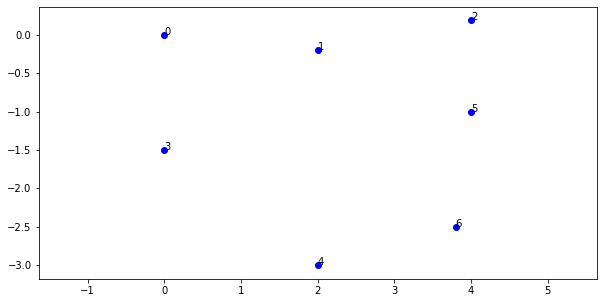

In [10]:
plt.figure(figsize=(10,5))
plt.axis('equal')
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "blue")
    plt.text(point_cloud[i][0], point_cloud[i][1], i)


 Cliques counting
	 time: 0:00:00.004072
	 contributions list lenght:  127
	 points in the ecc plot:     22

 Cliques counting igraph
	 time: 0:00:00.001817
	 contributions list lenght:  127
	 points in the ecc plot:     22


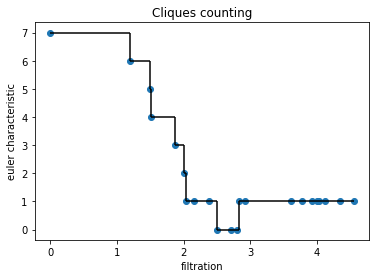

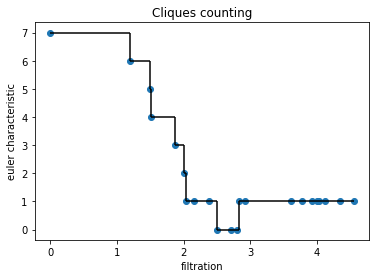

In [11]:
compare_methods(point_cloud, 10)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Circle

In [12]:
point_cloud = []

NUMBER_OF_POINTS = 100

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
point_cloud = np.array(point_cloud)

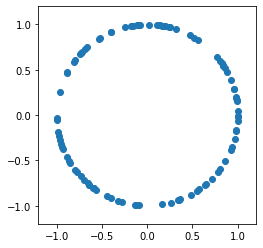

In [13]:
plt.axis('scaled')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.scatter(point_cloud[:,0], point_cloud[:,1])

Local Simplex
	 time: 0:00:02.305821
	 contributions list lenght:  245174
	 points in the ecc plot:     802

 Cliques counting
	 time: 0:00:30.756192
	 contributions list lenght:  245174
	 points in the ecc plot:     802

 Cliques counting igraph
	 time: 0:00:10.176121
	 contributions list lenght:  245174
	 points in the ecc plot:     802


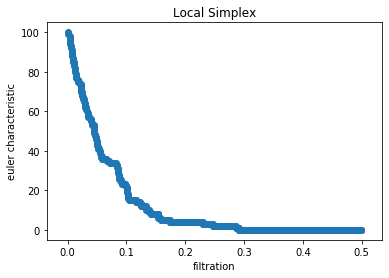

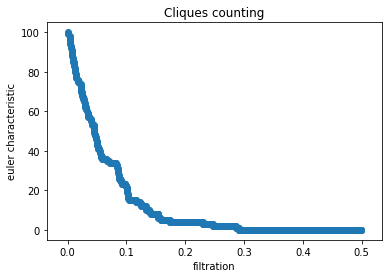

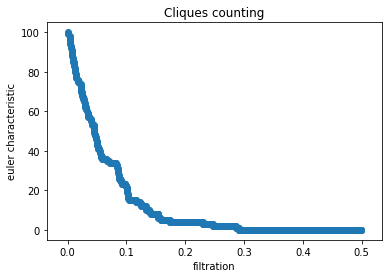

In [19]:
compare_methods(point_cloud, .5, False)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Double circle

In [ ]:
point_cloud = []

NUMBER_OF_POINTS = 25

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([5*np.cos(angle), 5*np.sin(angle)])
    
    
point_cloud = np.array(point_cloud)

In [ ]:
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

In [ ]:
compare_methods(point_cloud, 2, draw_lines=False)
#rounding error

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# infinity

In [ ]:
point_cloud = tadasets.infty_sign(n=50, noise=None)

In [ ]:
#plt.axis('scaled')
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

In [ ]:
compare_methods(point_cloud, 1)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# n shpere

In [ ]:
point_cloud = tadasets.dsphere(n=100, d=3, r=1, ambient=5, noise = 0)

In [ ]:
compare_methods(point_cloud, 1, draw_lines=False)

In [ ]:
# rounding error

## Hypercube

In [22]:
# random points in the unit cube

N_POINTS = 100
DIMENSION = 3

np.random.seed(42)
point_cloud = np.random.rand(N_POINTS,DIMENSION)

Local Simplex
	 time: 0:00:00.201313
	 contributions list lenght:  14328
	 points in the ecc plot:     748

 Cliques counting
	 time: 0:00:00.765559
	 contributions list lenght:  14328
	 points in the ecc plot:     748

 Cliques counting igraph
	 time: 0:00:00.326550
	 contributions list lenght:  14328
	 points in the ecc plot:     748


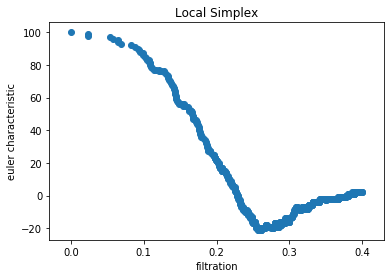

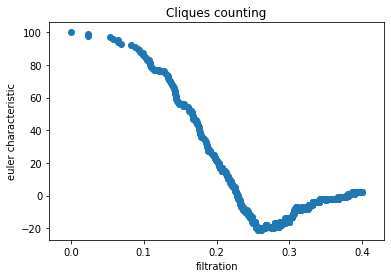

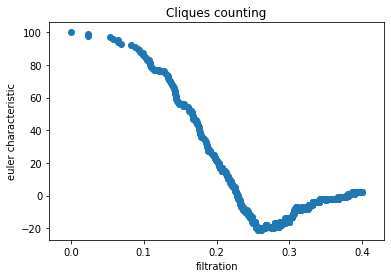

In [26]:
compare_methods(point_cloud, 0.4, draw_lines=False)

# GRID

In [3]:
def create_grid(dim, lenght):
    # creates #dim arrays each of #lenght numbers at 0.1 distance
    # then staks them together

    return np.stack(np.meshgrid( *[[x/10 for x in range(lenght)] for i in range(dim)]  ), -1).reshape(-1, dim)

In [4]:
point_cloud = create_grid(4, 5)

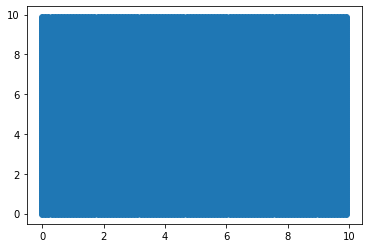

In [8]:
#plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

Local Simplex
	 time: 0:01:58.478940
	 contributions list lenght:  16
	 simplicies found:           12661304
	 points in the ecc plot:     16

 Cliques counting


KeyboardInterrupt: 

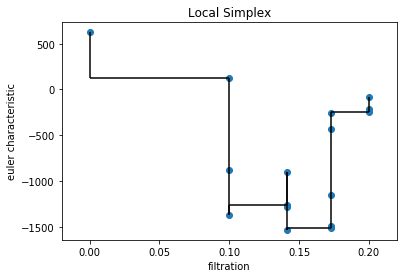

In [5]:
compare_methods(point_cloud, 0.2)